In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_excel("Train_set.xlsx")

In [3]:
test = pd.read_excel("Test_set.xlsx")

In [4]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
tot_df= train.append(test,sort= False)

In [7]:
tot_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [8]:
tot_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

# Feature Engineering

In [9]:
tot_df['Date']= tot_df.Date_of_Journey.str.split('/').str[0]
tot_df['Month']= tot_df.Date_of_Journey.str.split('/').str[1]
tot_df['Year']= tot_df.Date_of_Journey.str.split('/').str[2]

In [10]:
tot_df.Date= tot_df.Date.astype('int')
tot_df.Month= tot_df.Month.astype('int')
tot_df.Year= tot_df.Year.astype('int')

In [11]:
tot_df= tot_df.drop(['Date_of_Journey'],axis=1)

In [12]:
tot_df.Arrival_Time= tot_df.Arrival_Time.str.split(' ').str[0]

In [13]:
tot_df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
dtype: int64

In [14]:
tot_df[tot_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480.0,6,5,2019


In [15]:
tot_df['Total_Stops']=tot_df['Total_Stops'].fillna('1 stop')

In [16]:
tot_df['Total_Stops']=tot_df['Total_Stops'].replace('non-stop','0 stop')

In [17]:
tot_df['Stop'] = tot_df['Total_Stops'].str.split(' ').str[0]

In [18]:
tot_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Stop                object
dtype: object

In [19]:
tot_df['Stop']=tot_df['Stop'].astype(int)
tot_df=tot_df.drop(['Total_Stops'],axis=1)

In [20]:
tot_df['Arrival_Hour'] = tot_df['Arrival_Time'] .str.split(':').str[0]
tot_df['Arrival_Minute'] = tot_df['Arrival_Time'] .str.split(':').str[1]

In [21]:
tot_df['Arrival_Hour']=tot_df['Arrival_Hour'].astype(int)
tot_df['Arrival_Minute']=tot_df['Arrival_Minute'].astype(int)
tot_df=tot_df.drop(['Arrival_Time'],axis=1)

In [22]:
tot_df['Departure_Hour'] = tot_df['Dep_Time'] .str.split(':').str[0]
tot_df['Departure_Minute'] = tot_df['Dep_Time'] .str.split(':').str[1]

In [23]:
tot_df['Departure_Hour']=tot_df['Departure_Hour'].astype(int)
tot_df['Departure_Minute']=tot_df['Departure_Minute'].astype(int)
tot_df=tot_df.drop(['Dep_Time'],axis=1)

In [24]:
tot_df['Route_1']=tot_df['Route'].str.split('→ ').str[0]
tot_df['Route_2']=tot_df['Route'].str.split('→ ').str[1]
tot_df['Route_3']=tot_df['Route'].str.split('→ ').str[2]
tot_df['Route_4']=tot_df['Route'].str.split('→ ').str[3]
tot_df['Route_5']=tot_df['Route'].str.split('→ ').str[4]

In [25]:
tot_df['Price'].fillna((tot_df['Price'].mean()),inplace=True)

In [26]:
tot_df['Route_1'].fillna("None",inplace=True)
tot_df['Route_2'].fillna("None",inplace=True)
tot_df['Route_3'].fillna("None",inplace=True)
tot_df['Route_4'].fillna("None",inplace=True)
tot_df['Route_5'].fillna("None",inplace=True)

In [27]:
tot_df=tot_df.drop(['Route'],axis=1)
tot_df=tot_df.drop(['Duration'],axis=1)

In [28]:
tot_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [29]:
tot_df.isnull().sum()

Airline             0
Source              0
Destination         0
Additional_Info     0
Price               0
Date                0
Month               0
Year                0
Stop                0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
tot_df["Airline"]=encoder.fit_transform(tot_df['Airline'])
tot_df["Source"]=encoder.fit_transform(tot_df['Source'])
tot_df["Destination"]=encoder.fit_transform(tot_df['Destination'])
tot_df["Additional_Info"]=encoder.fit_transform(tot_df['Additional_Info'])
tot_df["Route_1"]=encoder.fit_transform(tot_df['Route_1'])
tot_df["Route_2"]=encoder.fit_transform(tot_df['Route_2'])
tot_df["Route_3"]=encoder.fit_transform(tot_df['Route_3'])
tot_df["Route_4"]=encoder.fit_transform(tot_df['Route_4'])
tot_df["Route_5"]=encoder.fit_transform(tot_df['Route_5'])

In [31]:
tot_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,2019,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.0,1,5,2019,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,13882.0,9,6,2019,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,6218.0,12,5,2019,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,13302.0,1,3,2019,1,21,35,16,50,0,34,8,12,4


# Feature Selection

In [32]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [33]:
train=tot_df[0:10683]
test=tot_df[10683:]

In [34]:
X=train.drop(['Price'],axis=1)
y=train.Price

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [36]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [37]:
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [38]:
model.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [39]:
selected_features=X_train.columns[(model.get_support())]

In [40]:
selected_features

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Stop', 'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour',
       'Departure_Minute', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

In [41]:
X_train=X_train.drop(['Year'],axis=1)

In [42]:
X_test=X_test.drop(['Year'],axis=1)

# RandomForestRegressor

In [43]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [44]:

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [45]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [46]:
# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               scoring='neg_mean_squared_error', n_iter = 50, cv = 5,
                               verbose=2, random_state=42, n_jobs = 1)

In [47]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   3.9s
[CV] n_estimators=200, min_samples_spl

[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   9.6s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   8.6s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   8.6s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   8.6s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   8.6s
[CV] n_estimators=100, mi

[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  12.0s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  11.7s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  11.2s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  11.3s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  12.9s
[CV] n_estimators=1200, min_samples_split=100, min_s

[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   8.9s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.4s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.4s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.7s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.9s
[CV] n_estimators=300, min_samples_split=

[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   9.1s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   9.8s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   6.5s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   6.1s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   6.0s
[CV] n_estimators=900, min_samples_split

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=  12.9s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=  13.1s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=  11.5s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   5.9s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   6.1s
[CV] n_estimators=600, min_samples_split=10

[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   4.0s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   3.9s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   3.9s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   3.8s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   5.1s
[CV] n_estimators=900, min_samples_split=

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 28.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [48]:
y_pred=rf_random.predict(X_test)

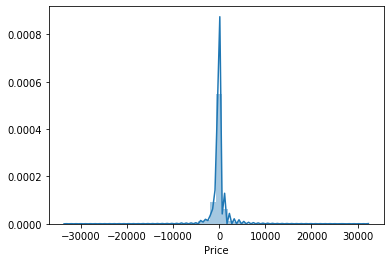

In [49]:
import seaborn as sns

sns.distplot(y_test-y_pred)

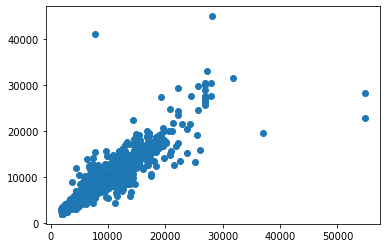

In [54]:
plt.scatter(y_test,y_pred)